# NLP Hotel Reviews

We are tasked with helping Hotel Management Inc. better understand what qualities of a hotel stay contribute to greater customer satisfaction and higher ratings. For this analysis, you are provided with a large data set consisting of hotel reviews (text fields for positive and negative comments) and details about the stay (hotel location, time & length of stay, etc). 

Your target column of interest is Reviewer_Score that encodes positive sentiment as 1 and negative as 0.

## Table of Contents

1. Exploratory Data Analysis
    - Perform EDA
2. Preprocessing
    - CountVectorizer
3. Modelling:
    - Regression model  
    - Pipeline
    - Evaluation

### Exploratory Data Analysis
First, let's load the data and understand what we are working with.

1. Perform EDA on the data and mention 3-4 observations from which you can draw actionable insights. In your EDA, you may consider creating a data dictionary, basic statistical analysis, data visualizations, data cleaning and preprocessing to prepare the data for modeling.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy import stats

In [5]:
# Load the dataset
hotel_reviews = pd.read_csv("Hotel_Reviews.csv")
hotel_reviews.head()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2


In [6]:
# Display the first few rows of the dataset and the data types of each column
hotel_reviews.dtypes

Unnamed: 0                                      int64
Additional_Number_of_Scoring                    int64
Average_Score                                 float64
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
Days_Since_Review                               int64
Latitude                                      float64
Longitude                                     float64
Day                                             int64
Month                                           int64
Year                                            int64
Reviewer_Nationality_Australia                  int64
Reviewer_Nationality_Ireland                    int64
Reviewer_Nationality_UAE    

In [7]:
hotel_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

In [8]:
hotel_reviews.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
515733    False
515734    False
515735    False
515736    False
515737    False
Length: 515738, dtype: bool

In [10]:
np.sum(hotel_reviews.duplicated())

0

In [11]:
hotel_reviews.describe(include = "all")

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738,515738.000000,515738.000000,515738,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
unique,NaN,NaN,NaN,330011,NaN,NaN,412601,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,127890,NaN,NaN,35946,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,257868.500000,498.081836,8.397487,NaN,18.539450,2743.743944,NaN,17.776458,7.166001,0.570006,...,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,148880.880902,500.538467,0.548048,NaN,29.690831,2317.464868,NaN,21.804185,11.040228,0.495075,...,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,0.000000,1.000000,5.200000,NaN,0.000000,43.000000,NaN,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,128934.250000,169.000000,8.100000,NaN,2.000000,1161.000000,NaN,5.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,257868.500000,341.000000,8.400000,NaN,9.000000,2134.000000,NaN,11.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,386802.750000,660.000000,8.800000,NaN,23.000000,3613.000000,NaN,22.000000,8.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000


In [15]:
hotel_reviews = hotel_reviews.drop(['Unnamed: 0'], axis=1)

In [16]:
hotel_reviews.describe(include = "all")

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738,515738.000000,515738.000000,515738,515738.000000,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
unique,NaN,NaN,330011,NaN,NaN,412601,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,127890,NaN,NaN,35946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,498.081836,8.397487,NaN,18.539450,2743.743944,NaN,17.776458,7.166001,0.570006,354.441932,...,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,500.538467,0.548048,NaN,29.690831,2317.464868,NaN,21.804185,11.040228,0.495075,208.928124,...,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,1.000000,5.200000,NaN,0.000000,43.000000,NaN,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,169.000000,8.100000,NaN,2.000000,1161.000000,NaN,5.000000,1.000000,0.000000,175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,341.000000,8.400000,NaN,9.000000,2134.000000,NaN,11.000000,3.000000,1.000000,353.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,660.000000,8.800000,NaN,23.000000,3613.000000,NaN,22.000000,8.000000,1.000000,527.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000


In [17]:
(hotel_reviews.isna().sum()/hotel_reviews.shape[0])*100

Additional_Number_of_Scoring                  0.0
Average_Score                                 0.0
Negative_Review                               0.0
Review_Total_Negative_Word_Counts             0.0
Total_Number_of_Reviews                       0.0
Positive_Review                               0.0
Review_Total_Positive_Word_Counts             0.0
Total_Number_of_Reviews_Reviewer_Has_Given    0.0
Reviewer_Score                                0.0
Days_Since_Review                             0.0
Latitude                                      0.0
Longitude                                     0.0
Day                                           0.0
Month                                         0.0
Year                                          0.0
Reviewer_Nationality_Australia                0.0
Reviewer_Nationality_Ireland                  0.0
Reviewer_Nationality_UAE                      0.0
Reviewer_Nationality_UK                       0.0
Reviewer_Nationality_USA                      0.0


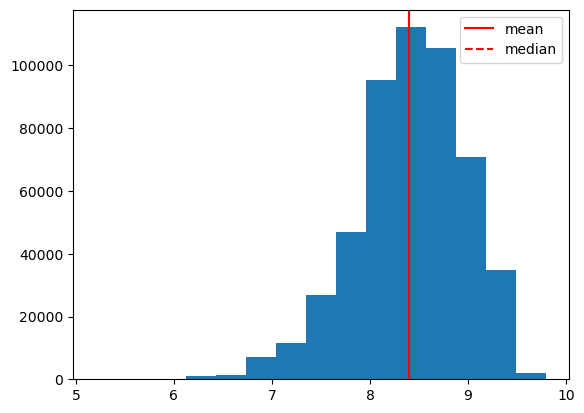

In [18]:
plt.hist(hotel_reviews.Average_Score, bins=15)
plt.axvline(hotel_reviews.Average_Score.mean(), c="red", label= "mean")
plt.axvline(hotel_reviews.Average_Score.median(), c="red", linestyle="--", label= "median")
plt.legend()
plt.show()

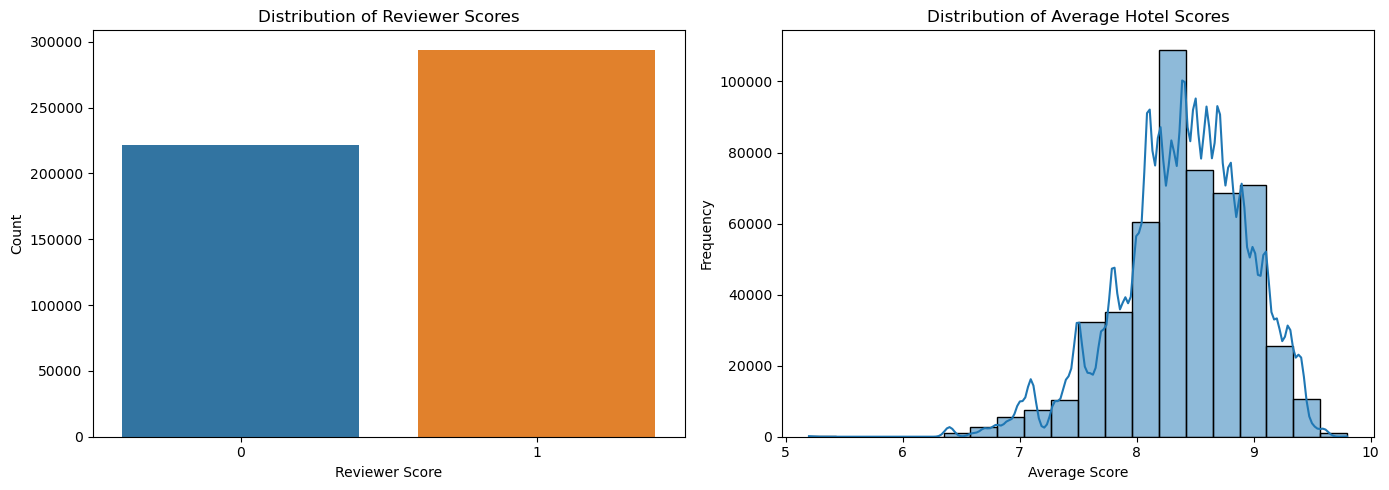

(       Additional_Number_of_Scoring  Average_Score  \
 count                 515738.000000  515738.000000   
 mean                     498.081836       8.397487   
 std                      500.538467       0.548048   
 min                        1.000000       5.200000   
 25%                      169.000000       8.100000   
 50%                      341.000000       8.400000   
 75%                      660.000000       8.800000   
 max                     2682.000000       9.800000   
 
        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
 count                      515738.000000            515738.000000   
 mean                           18.539450              2743.743944   
 std                            29.690831              2317.464868   
 min                             0.000000                43.000000   
 25%                             2.000000              1161.000000   
 50%                             9.000000              2134.000000   
 75%         

In [22]:
# Basic statistical overview
stats_overview = hotel_reviews.describe()

# Check for missing values
missing_values = hotel_reviews.isnull().sum()

# Visualizing the distribution of review scores and average hotel scores
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Reviewer_Score', data=hotel_reviews, ax=ax[0])
ax[0].set_title('Distribution of Reviewer Scores')
ax[0].set_xlabel('Reviewer Score')
ax[0].set_ylabel('Count')

sns.histplot(hotel_reviews['Average_Score'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Average Hotel Scores')
ax[1].set_xlabel('Average Score')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

stats_overview, missing_values

The EDA included the checking of basic analysis of the data, including checking for duplicates, which were none. We also removed the first column as it was unkown and similar to serial numbers, which made it irrelevant.
With the data visualiuzation, it was good to find out the distribution of Reviewer Scores b/w 0 & 1 and Average Hotel scores mean and distribuition of the values.

## Preprocessing

Next, the text data needs to be processed for modelling.

2. Split the data into train and test sets and transform the positive and negative review columns using a CountVectorizer. Consider the following:

    What tokenizer and text cleaning steps do you include?

    Using the vectorizer, maximize the number of features at 500 and make sure that tokens used <10 times are dropped from the vocabulary.

This process may be done on the positive and negative review columns separately and then the resulting arrays merged with the original numeric features to form the final train and test data frames ready for modelling. In your column names, make sure you mark which words are coming from the positive vs negative reviews (you can use a prefix such as pos_ and neg_).

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Split the dataset into train and test sets
train_data, test_data = train_test_split(hotel_reviews, test_size=0.2, random_state=42)

# Define CountVectorizer for negative reviews
neg_vectorizer = CountVectorizer(max_features=500, min_df=10, stop_words='english')

# Fit and transform the negative reviews
neg_train_features = neg_vectorizer.fit_transform(train_data['Negative_Review'])
neg_test_features = neg_vectorizer.transform(test_data['Negative_Review'])

# Define CountVectorizer for positive reviews
pos_vectorizer = CountVectorizer(max_features=500, min_df=10, stop_words='english')

# Fit and transform the positive reviews
pos_train_features = pos_vectorizer.fit_transform(train_data['Positive_Review'])
pos_test_features = pos_vectorizer.transform(test_data['Positive_Review'])

# Convert to DataFrame
neg_train_df = pd.DataFrame(neg_train_features.toarray(), columns=["neg_" + feature for feature in neg_vectorizer.get_feature_names_out()])
pos_train_df = pd.DataFrame(pos_train_features.toarray(), columns=["pos_" + feature for feature in pos_vectorizer.get_feature_names_out()])

neg_test_df = pd.DataFrame(neg_test_features.toarray(), columns=["neg_" + feature for feature in neg_vectorizer.get_feature_names_out()])
pos_test_df = pd.DataFrame(pos_test_features.toarray(), columns=["pos_" + feature for feature in pos_vectorizer.get_feature_names_out()])

# Reset index to merge properly
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Merge the numeric and text features for train and test sets
final_train_df = pd.concat([train_data.drop(columns=['Positive_Review', 'Negative_Review']), pos_train_df, neg_train_df], axis=1)
final_test_df = pd.concat([test_data.drop(columns=['Positive_Review', 'Negative_Review']), pos_test_df, neg_test_df], axis=1)

final_train_df.shape, final_test_df.shape

((412590, 1027), (103148, 1027))

Here, we split the data into train and test model with transforming the positive and negative review.

The tokenizer used i.e. the default CountVectorize extracts words based on regex patterns. ALso, common English stop words (such as "and", "the", "is", etc.) are removed from the text during the tokenization process. Stop words are typically filtered out before processing natural language data to focus on more meaningful words.

## Modelling
As the data is now ready for modelling, we will be creating two separate models with optimization and evaluation of each.

3. Fit a logistic regression model on the data and analyze the test and train accuracy. Find the top 20 words from the positive reviews that are most predictive of a positive sentiment (Reviewer_Score = 1). Similarly, find the top 20 words from the negative reviews that are most predictive of a negative sentiment (Reviewer_Score = 0). 
What actionable insights can you draw from these?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(final_train_df.drop(columns='Reviewer_Score'), train_data['Reviewer_Score'])

# Predict on training and testing data
train_preds = log_reg.predict(final_train_df.drop(columns='Reviewer_Score'))
test_preds = log_reg.predict(final_test_df.drop(columns='Reviewer_Score'))

# Calculate accuracy on both sets
train_accuracy = accuracy_score(train_data['Reviewer_Score'], train_preds)
test_accuracy = accuracy_score(test_data['Reviewer_Score'], test_preds)

# Extracting coefficients
coefficients = log_reg.coef_[0]
features = final_train_df.drop(columns='Reviewer_Score').columns

# Mapping coefficients to features
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.set_index('Feature')

# Top 20 words for positive and negative sentiments
top_positive_words = feature_importance.loc[feature_importance['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False).head(20)
top_negative_words = feature_importance.loc[feature_importance['Coefficient'] < 0].sort_values(by='Coefficient').head(20)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Top 20 Positive Words:", top_positive_words)
print("Top 20 Negative Words:", top_negative_words)

Marketing and Service Improvement: Apply knowledge from the most favorable terms in advertising and concentrate on bringing these qualities even closer to perfection.

Operational Improvements: Make adjustments to operations or provide staff training to address the problems indicated by the most negative terms.

4. Using a pipeline, combine PCA with a decision tree classifier.

    Optimize at least 3 hyperparameters including the maximum tree depth and the minimum number of data points required on each leaf node.
    You can use 20 principle components.
    The best parameters should be found using 5-fold cross validation.

    Contrast the best results here with the logistic regression model and provide any insights that you may draw from the results.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Setup the pipeline steps
steps = [
    ('pca', PCA(n_components=20)),
    ('decision_tree', DecisionTreeClassifier())
]

# Create the pipeline
pipeline = Pipeline(steps)

# Parameter grid
param_grid = {
    'decision_tree__max_depth': [10, 20, 30, 40, 50],
    'decision_tree__min_samples_leaf': [1, 2, 4, 6, 8],
    'decision_tree__min_samples_split': [2, 10, 20, 30]
}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(final_train_df.drop(columns='Reviewer_Score'), train_data['Reviewer_Score'])

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Compare with logistic regression model
decision_tree_test_accuracy = grid_search.score(final_test_df.drop(columns='Reviewer_Score'), test_data['Reviewer_Score'])
# print("Logistic Regression Test Accuracy:", log_reg_test_accuracy)
print("Decision Tree Test Accuracy:", decision_tree_test_accuracy)

5. For your best performing model, conduct a more in-depth evaluation by analyzing the confusion matrix and commenting on the model errors and metrics such as precision and recall.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict on the test data
test_preds = decision_tree_test_accuracy.predict(final_test_df.drop(columns='Reviewer_Score'))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_data['Reviewer_Score'], test_preds)

# Calculate precision, recall, and F1-score
class_report = classification_report(test_data['Reviewer_Score'], test_preds)

# Display results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

test_accuracy = accuracy_score(test_data['Reviewer_Score'], test_preds)
print("Test Accuracy:", test_accuracy)